## Project K_S

## Multiple Linear Regression

### Import the libraries

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from scipy  import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

###  Load and read the dataset

In [3]:
df = pd.read_csv("ks-projects-201801.csv")

np.random.seed(0)

In [4]:
df.shape

(378661, 15)

## Let take a look at few rows of the datasets

In [5]:
df.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
338862,796196901,10G Christmas Tree,Art,Art,USD,2010-12-26,10526.0,2010-12-08 08:44:04,0.0,failed,0,US,0.0,0.0,10526.0
277871,483825010,Gliff,Gaming Hardware,Games,USD,2016-03-28,10000.0,2016-01-28 04:56:18,51.0,failed,5,US,51.0,51.0,10000.0
47000,123916947,STUFFED Food Truck,Food Trucks,Food,USD,2015-01-06,60000.0,2014-11-07 02:24:36,25.0,failed,1,US,25.0,25.0,60000.0
111338,1565733636,NeoExodus Adventure: Origin of Man for Pathfin...,Tabletop Games,Games,USD,2012-05-01,500.0,2012-03-15 01:16:10,585.0,successful,17,US,585.0,585.0,500.0
53743,1273544891,NAPOLEON IN NEW YORK! an original TV Series,Comedy,Film & Video,USD,2016-07-26,25000.0,2016-05-27 00:07:25,25.0,failed,1,US,25.0,25.0,25000.0


In [6]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [7]:
df.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


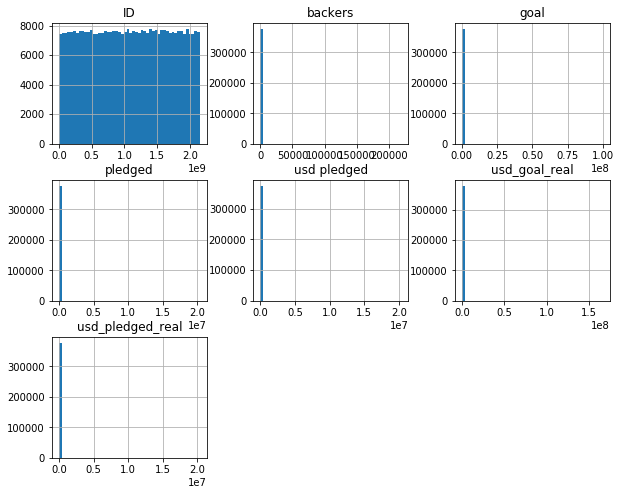

In [8]:
df.hist(bins =50, figsize=(10, 8))
plt.show()

In [9]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

### Basic insight of the Dataset

#### data types

In [10]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

### Describe

In [11]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [12]:
df.describe(include = 'all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,378657,378661,378661,378661,378661,3.786610e+05,378661,3.786610e+05,378661,378661.000000,378661,3.748640e+05,3.786610e+05,3.786610e+05
unique,NaN,375764,159,15,14,3164,NaN,378089,NaN,6,NaN,23,NaN,NaN,NaN
top,NaN,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,NaN,1970-01-01 01:00:00,NaN,failed,NaN,US,NaN,NaN,NaN
freq,NaN,41,22314,63585,295365,705,NaN,7,NaN,197719,NaN,292627,NaN,NaN,NaN
mean,1.074731e+09,NaN,NaN,NaN,NaN,NaN,4.908079e+04,NaN,9.682979e+03,NaN,105.617476,NaN,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,NaN,NaN,NaN,NaN,NaN,1.183391e+06,NaN,9.563601e+04,NaN,907.185035,NaN,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,3.000000e+01,NaN,2.000000,NaN,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,NaN,NaN,NaN,NaN,NaN,5.200000e+03,NaN,6.200000e+02,NaN,12.000000,NaN,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,NaN,NaN,NaN,NaN,NaN,1.600000e+04,NaN,4.076000e+03,NaN,56.000000,NaN,3.034090e+03,4.050000e+03,1.550000e+04


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,378661.0,1.074731e+09,6.190862e+08,5971.00,5.382635e+08,1.075276e+09,1.610149e+09,2.147476e+09
goal,378661.0,4.908079e+04,1.183391e+06,0.01,2.000000e+03,5.200000e+03,1.600000e+04,1.000000e+08
pledged,378661.0,9.682979e+03,9.563601e+04,0.00,3.000000e+01,6.200000e+02,4.076000e+03,2.033899e+07
backers,378661.0,1.056175e+02,9.071850e+02,0.00,2.000000e+00,1.200000e+01,5.600000e+01,2.193820e+05
usd pledged,374864.0,7.036729e+03,7.863975e+04,0.00,1.698000e+01,3.947200e+02,3.034090e+03,2.033899e+07
usd_pledged_real,378661.0,9.058924e+03,9.097334e+04,0.00,3.100000e+01,6.243300e+02,4.050000e+03,2.033899e+07
usd_goal_real,378661.0,4.545440e+04,1.152950e+06,0.01,2.000000e+03,5.500000e+03,1.550000e+04,1.663614e+08


### Info

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


### Identify and Handling Missing Values

In [15]:
missing_data = df.isnull()
missing_data

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
378657,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
378658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
378659,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Let get the number of missing_data point per column

In [16]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

ID
False    378661
Name: ID, dtype: int64

name
False    378657
True          4
Name: name, dtype: int64

category
False    378661
Name: category, dtype: int64

main_category
False    378661
Name: main_category, dtype: int64

currency
False    378661
Name: currency, dtype: int64

deadline
False    378661
Name: deadline, dtype: int64

goal
False    378661
Name: goal, dtype: int64

launched
False    378661
Name: launched, dtype: int64

pledged
False    378661
Name: pledged, dtype: int64

state
False    378661
Name: state, dtype: int64

backers
False    378661
Name: backers, dtype: int64

country
False    378661
Name: country, dtype: int64

usd pledged
False    374864
True       3797
Name: usd pledged, dtype: int64

usd_pledged_real
False    378661
Name: usd_pledged_real, dtype: int64

usd_goal_real
False    378661
Name: usd_goal_real, dtype: int64



## How many missing_data do we have

In [17]:
missing_values = df.isnull().sum()
missing_values

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

### Deal with missing_values

In [18]:
avg_usd_pled = df['usd pledged'].astype('float').mean(axis=0)
avg_usd_pled

7036.728867109212

In [19]:
df["usd pledged"].replace(np.nan,avg_usd_pled, inplace = True )

### drop column with atleast one missing_value

In [20]:
columns_with_na_dropped = df.dropna(axis =1)
columns_with_na_dropped.head()

,ID,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [21]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## Drop the unused column

In [22]:
df.drop("state",  axis = 1, inplace=True)

In [23]:
df.drop("country",  axis = 1, inplace=True)

In [24]:
print("Column in the Original dataset: %d \n" % df.shape[1])
print("Column with na's dropped: %d" % columns_with_na_dropped.shape[1])

Column in the Original dataset: 13 

Column with na's dropped: 14


## Scaling




### Let generate 1000 data points randomly drawn from exponential distribution

Text(0.5, 1.0, 'scaled_data')

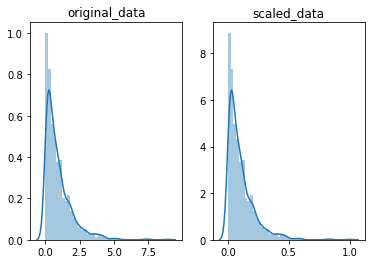

In [25]:
original_data = np.random.exponential(size = 1000)


## Let min_max scale of the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

#plot both together to compare

fig,ax=plt.subplots(1, 2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("original_data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("scaled_data")

### Normalization

Text(0.5, 1.0, 'normalized_data')

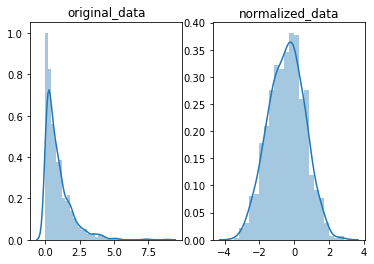

In [26]:
normalized_data = stats.boxcox(original_data)


fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title('original_data')
sns.distplot(normalized_data[0] , ax=ax[1])
ax[1].set_title('normalized_data')

### Check the value_count of the all the categorical dataset

In [27]:
df["category"].unique()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

In [28]:
# df["category"].value_counts().to_frame()
df_counts= df['category'].value_counts()
df_counts[-10:]

Embroidery         113
Typography         108
Pottery            100
Weaving             93
Quilts              81
Residencies         69
Letterpress         49
Chiptune            35
Literary Spaces     27
Taxidermy           13
Name: category, dtype: int64

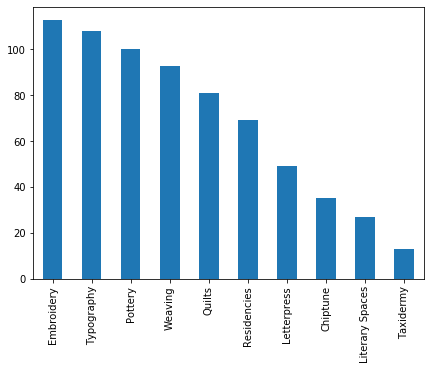

In [29]:
df_counts[-10:].plot(kind= "bar", figsize=(7,5))

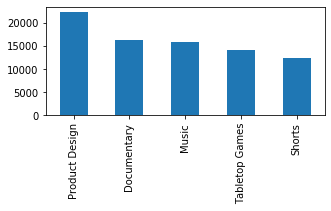

In [30]:
df_counts[:5].plot(kind ="bar",figsize=(5, 2))

In [31]:
df["main_category"].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [32]:
df_counts= df['main_category'].value_counts()
df_counts[-15:]

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

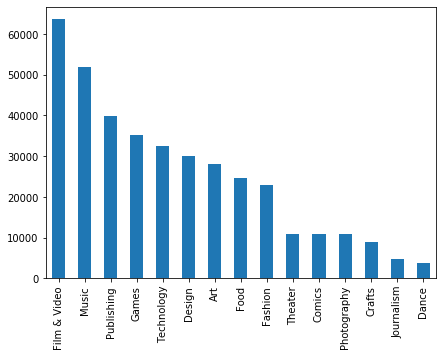

In [33]:
df_counts[-15:].plot(kind = "bar", figsize=(7,5))

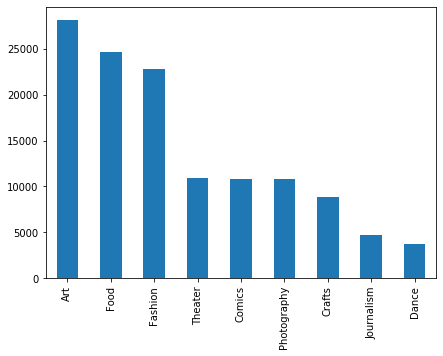

In [34]:
df_counts[6:].plot(kind = "bar", figsize=(7,5))

###  Declare the columns you use as features

In [35]:
features = ["backers", "pledged", "usd_pledged_real","usd pledged"]

### Declare the prediction Target

In [36]:
target = ["usd_goal_real"]

### Extract the features and target into separate dataframe

In [37]:
X = df[features]

In [38]:
y = df[target]

In [39]:
print(X)

        backers  pledged  usd_pledged_real  usd pledged
0             0      0.0               0.0          0.0
1            15   2421.0            2421.0        100.0
2             3    220.0             220.0        220.0
3             1      1.0               1.0          1.0
4            14   1283.0            1283.0       1283.0
...         ...      ...               ...          ...
378656        1     25.0              25.0         25.0
378657        5    155.0             155.0        155.0
378658        1     20.0              20.0         20.0
378659        6    200.0             200.0        200.0
378660       17    524.0             524.0        524.0

[378661 rows x 4 columns]


In [40]:
print(y)

        usd_goal_real
0             1533.95
1            30000.00
2            45000.00
3             5000.00
4            19500.00
...               ...
378656       50000.00
378657        1500.00
378658       15000.00
378659       15000.00
378660        2000.00

[378661 rows x 1 columns]


### Split the dataset into Training set and Test set

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [42]:
print(X_train)

        backers  pledged  usd_pledged_real   usd pledged
100719        6    288.0            288.00     76.000000
204128        0      0.0              0.00      0.000000
190999        0      0.0              0.00      0.000000
279184        0   6505.0           6505.00   7036.728867
248433        1      1.0              1.00      1.000000
...         ...      ...               ...           ...
73349         0      0.0              0.00      0.000000
371403        2    200.0             23.18     23.660000
312201      185   6641.0           6641.00   1226.000000
267336       50   7351.0           7351.00   7351.000000
128037      169  16000.0          16000.00  16000.000000

[283995 rows x 4 columns]


In [43]:
print(X_test)

        backers  pledged  usd_pledged_real  usd pledged
99838         4   600.00            600.00   100.000000
15731        54  2920.00           2920.00  2920.000000
339459        1    75.00             75.00    75.000000
100211       60  5365.00           5365.00  5365.000000
170820       53  5111.06           5111.06  5111.060000
...         ...      ...               ...          ...
235021       72  7710.00           7710.00  7710.000000
152790        3    12.00             12.00    12.000000
50680         0  7640.00           7640.00  7036.728867
37326         4  1800.00            208.39   214.870000
151350        0     0.00              0.00     0.000000

[94666 rows x 4 columns]


In [44]:
print(y_train)

        usd_goal_real
100719       39500.00
204128        8000.00
190999       18359.04
279184        6500.00
248433        1000.00
...               ...
73349        11999.00
371403         173.85
312201       16000.00
267336        7200.00
128037       15000.00

[283995 rows x 1 columns]


In [45]:
print(y_test)

        usd_goal_real
99838          600.00
15731         3500.00
339459       10000.00
100211        5000.00
170820        5000.00
...               ...
235021        2000.00
152790      250000.00
50680         7500.00
37326        28943.22
151350       25000.00

[94666 rows x 1 columns]


### Training the Multiple Linear Regression Model on the Training set

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict the Test result

In [47]:
y_pred = regressor.predict(X_test)
y_pred

array([[45985.93073695],
       [46233.66072383],
       [45980.74111421],
       ...,
       [46434.17601558],
       [45957.90816133],
       [45974.57562961]])

### Evaluating the model performance

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(y_test,y_pred)

5.958232939873298e-05

### Visualising Multiple Linear Regression Model

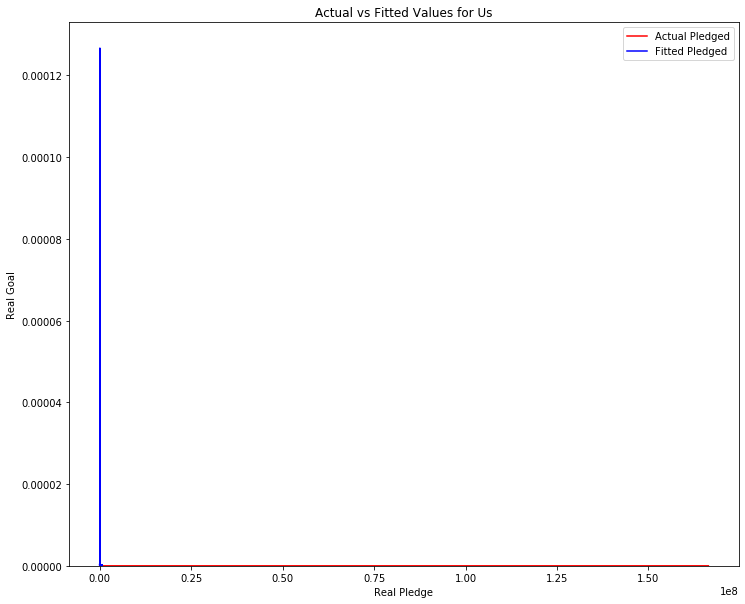

In [50]:
width = 12
height = 10

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df[target], hist=False, color="r", label="Actual Pledged")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Pledged" , ax=ax1)


plt.title('Actual vs Fitted Values for Us')
plt.xlabel('Real Pledge')
plt.ylabel('Real Goal')

plt.show()
plt.close()